In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score

import networkx as nx
import community as cmnt # python-louvain library

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from importlib import reload
import nx_tools as nxt

# 1. Network Overview 

Directed network including 'Unemployed' and 'Student'

In [249]:
df_origin1 = pd.read_csv("../data/processed/edges_and_weight.csv")
df_origin1.head(3)

weight source        target
0       1   2910           340
1       1   2720          2200
2       8   2200  'Unemployed'

In [250]:
sum(df_origin1.duplicated(subset=["source","target"]))

0

In [251]:
G1 = nx.DiGraph()

for i in range(df_origin1.shape[0]):
    G1.add_edge(df_origin1.loc[i,'source'], df_origin1.loc[i,'target'], weight=df_origin1.loc[i,'weight'])


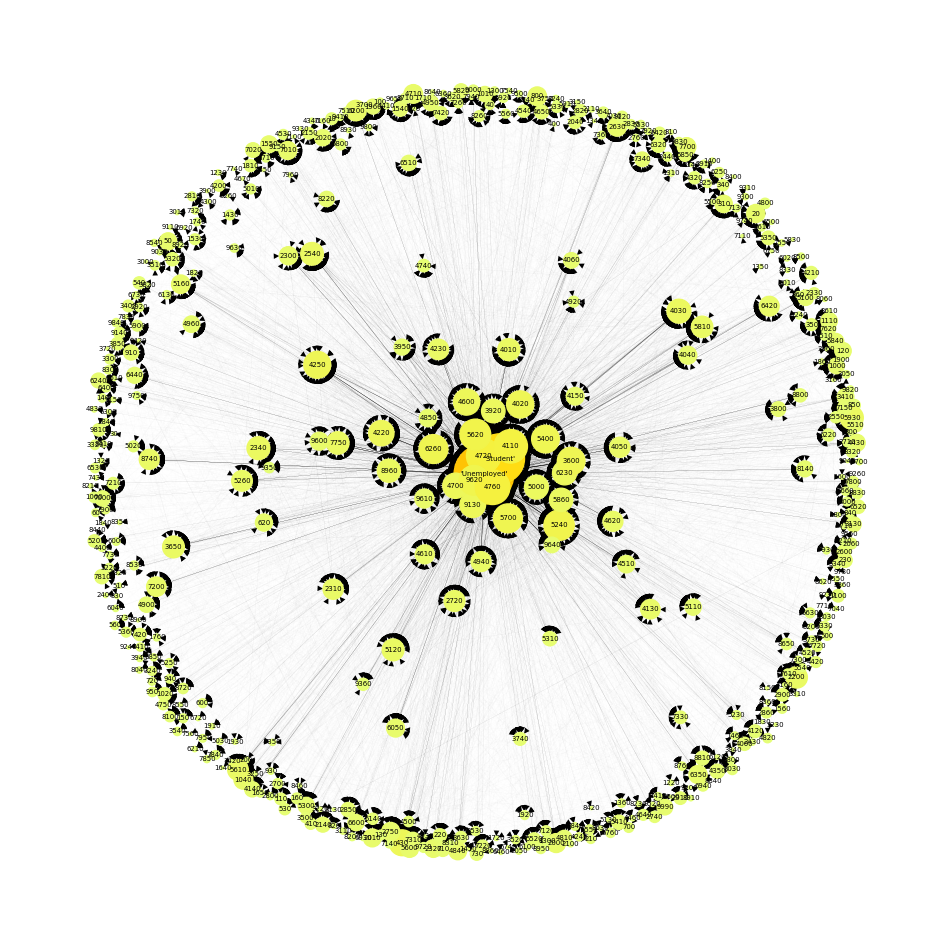

In [15]:
cmap_n = plt.colormaps.get_cmap("Wistia")
colors_n = [cmap_n(val/800) for val in dict(G1.in_degree).values()]
node_size=[val*5 for val in dict(G1.in_degree).values()]
edge_thickness = [(val[2]/1000)*2 for val in G1.edges.data("weight")]

fig, ax = plt.subplots()
fig.set_size_inches(12, 12)

nx.draw(
        G1,
	    node_color=colors_n,
	    # edge_color=colors_e,
        # edgecolors="black",
	    node_size=node_size, 
	    width=edge_thickness,
	    with_labels=True,
        font_color="black",
        font_size=5,
	    pos=nx.spring_layout(G1, k=80*1./np.sqrt(len(G1.nodes)), iterations=100),
        ax=ax
    )
plt.show()

In [9]:
reload(nxt)
nxt.network_summary(G1)

GENERAL
	number of nodes: 478
	number of edges: 7883
	is_directed: True
	is_weighted: True
	is_strongly_connected: False
	is_weakly_connected: True
IN-DEGREE (NORMALIZED)
	min: 0.0
	mean: 0.034573651570572704
	median: 0.016771488469601678
	max: 0.7756813417190777
	top nodes: ["'Unemployed'", "'Student'", '4760', '4720', '4110', '5620', '5240', '9620', '5700', '6260', '3600', '5400']
	           [0.7756813417190777, 0.5345911949685535, 0.25995807127882603, 0.2557651991614256, 0.24318658280922434, 0.20545073375262055, 0.19916142557651992, 0.1907756813417191, 0.18029350104821804, 0.18029350104821804, 0.16561844863731656, 0.16561844863731656]
	tail nodes: ['9240', '1640', '8150', '8440', '7710', '8840', '3750', '9560', '9730', '9260']
	           [0.0020964360587002098, 0.0020964360587002098, 0.0020964360587002098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
OUT-DEGREE (NORMALIZED)
	min: 0.0
	mean: 0.03457365157057271
	median: 0.012578616352201259
	max: 0.7379454926624738
	top nodes: ["'Unemployed'

# 2. Directed Network excluding 'Unemployed' and 'Student'

In [450]:
df_origin2 = pd.read_csv("../data/processed/edges_and_weight(occ).csv")
df_origin2.head(3)

weight  source  target
0       1    2910     340
1       1    2720    2200
2       3    2720     430

In [453]:
G2 = nx.DiGraph()

for i in range(df_origin2.shape[0]):
    G2.add_edge(df_origin2.loc[i,'source'], df_origin2.loc[i,'target'], weight=df_origin2.loc[i,'weight'])

# G2.remove_node(7070)

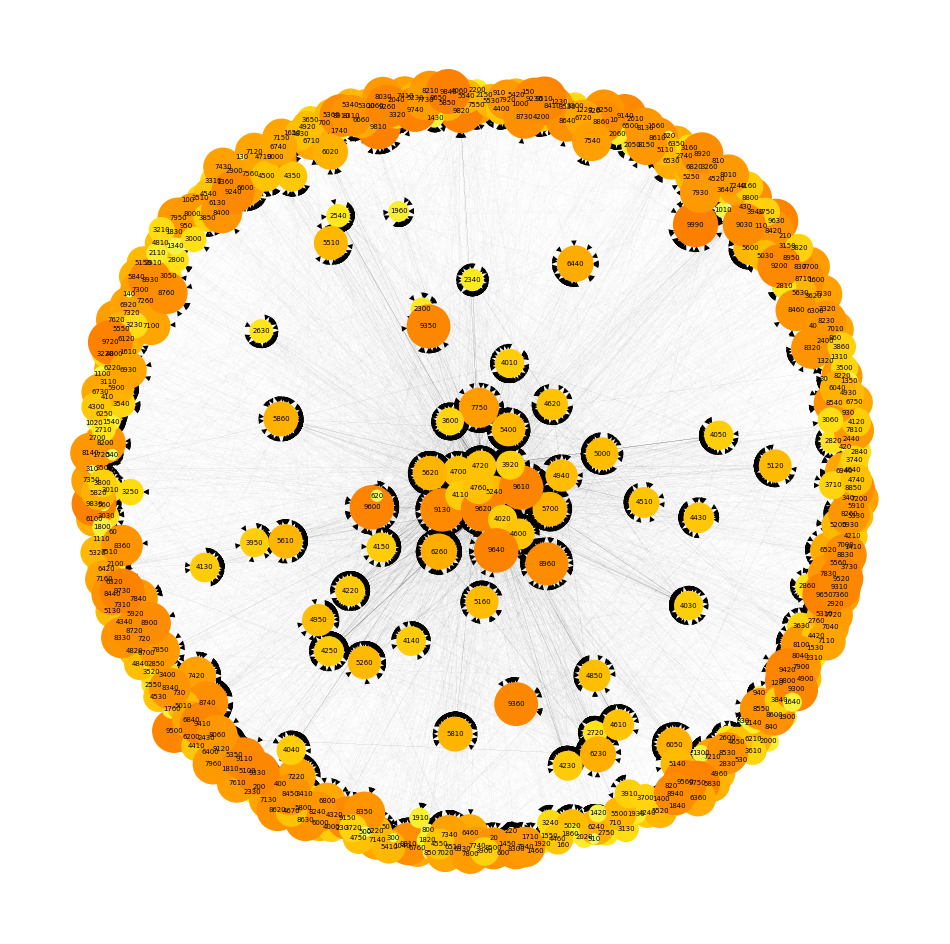

In [496]:
cmap_n = plt.colormaps.get_cmap("Wistia")

centrality = nx.in_degree_centrality(G2)
# colors_n = [cmap_n(val/800) for val in dict(G2.in_degree).values()]
colors_n = [cmap_n(u/(0.01+max(centrality))) for u in centrality]
# node_size = [val*7 for val in dict(G2.in_degree).values()]
node_size = [1000*u/(0.01+max(centrality)) for u in centrality]
edge_thickness = [(val[2]/1000)*2 for val in G2.edges.data("weight")]

fig, ax = plt.subplots()
fig.set_size_inches(12, 12)

nx.draw(
        G2,
	    node_color=colors_n,
	    node_size=node_size, 
	    width=edge_thickness,
	    with_labels=True,
        font_color="black",
        font_size=5,
	    pos=nx.spring_layout(G2, k=80*1./np.sqrt(len(G2.nodes)), iterations=100),
        ax=ax
    )
plt.show()

In [509]:
reload(nxt)
nxt.network_summary(G2)

GENERAL
	number of nodes: 472
	number of edges: 8370
	is_directed: True
	is_weighted: True
 is_strongly_connected: False
 is_weakly_connected: True
IN-DEGREE (NORMALIZED)
	min: 0.0
	mean: 0.03764978948504804
	median: 0.01910828025477707
	max: 0.3078556263269639
	top nodes: [4760, 4720, 4110, 5620, 5240, 6260, 9620, 4020, 4250, 5700, 5400, 4220]
	           [0.3078556263269639, 0.29723991507430997, 0.28662420382165604, 0.24416135881104034, 0.23779193205944799, 0.2229299363057325, 0.2229299363057325, 0.21443736730360935, 0.21019108280254778, 0.20382165605095542]
	tail nodes: [9110, 8150, 8450, 8440, 3840, 3750, 9560, 9730, 9260, 9330]
	           [0.0021231422505307855, 0.0021231422505307855, 0.0021231422505307855, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
OUT-DEGREE (NORMALIZED)
	min: 0.0
	mean: 0.037649789485048046
	median: 0.012738853503184714
	max: 0.4989384288747346
	top nodes: [9620, 4760, 4720, 9130, 4110, 4700, 5620, 5240, 4020, 9610, 5700, 5400]
	           [0.4989384288747346, 0.49044

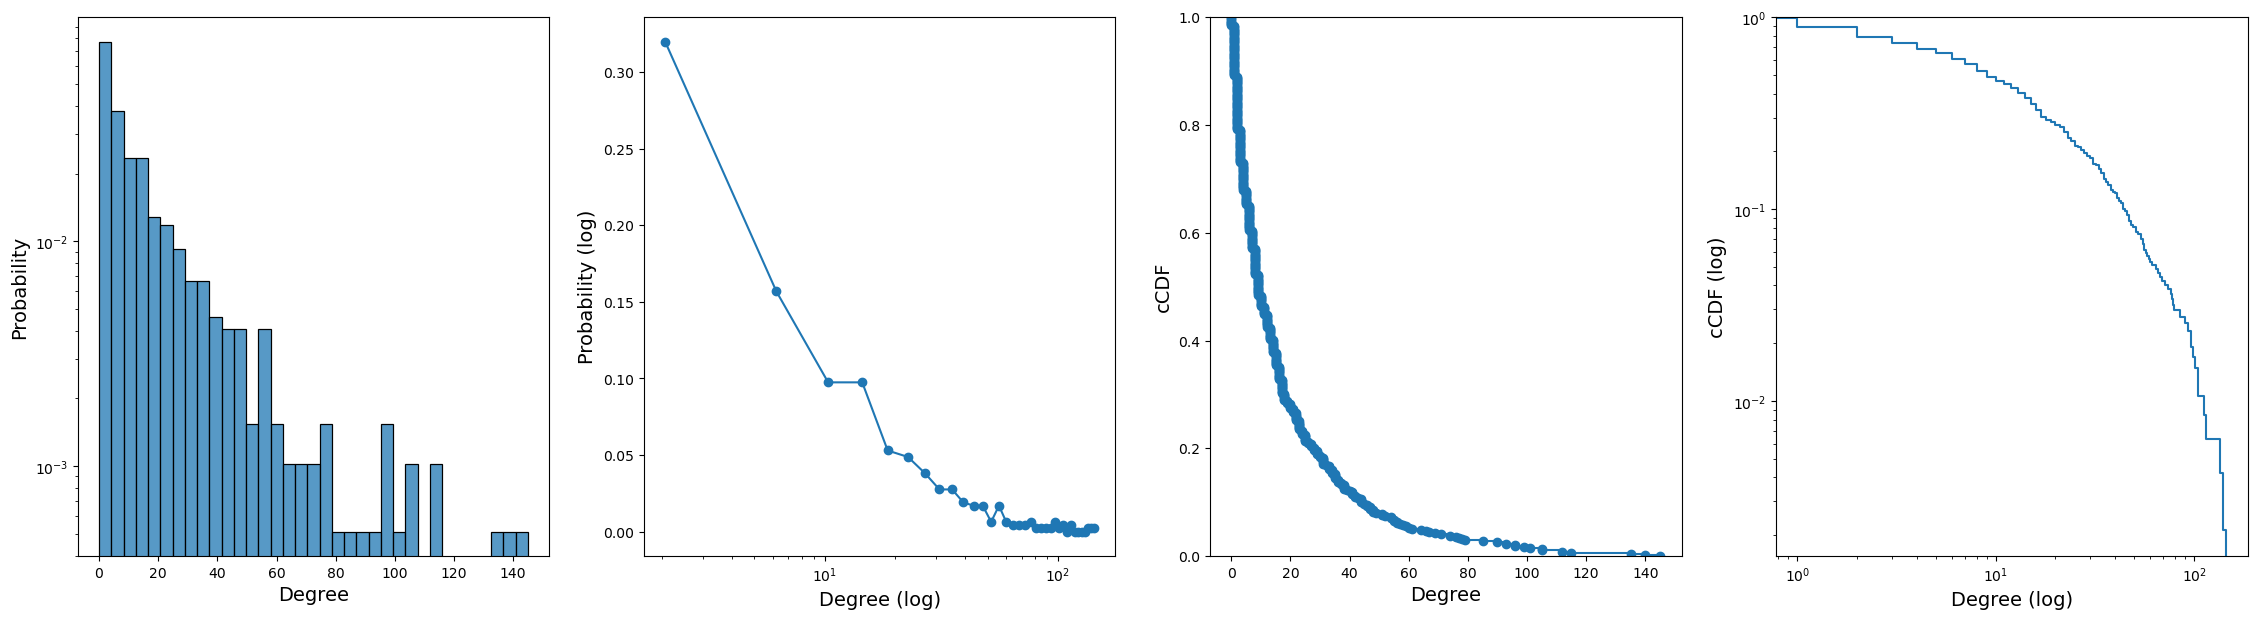

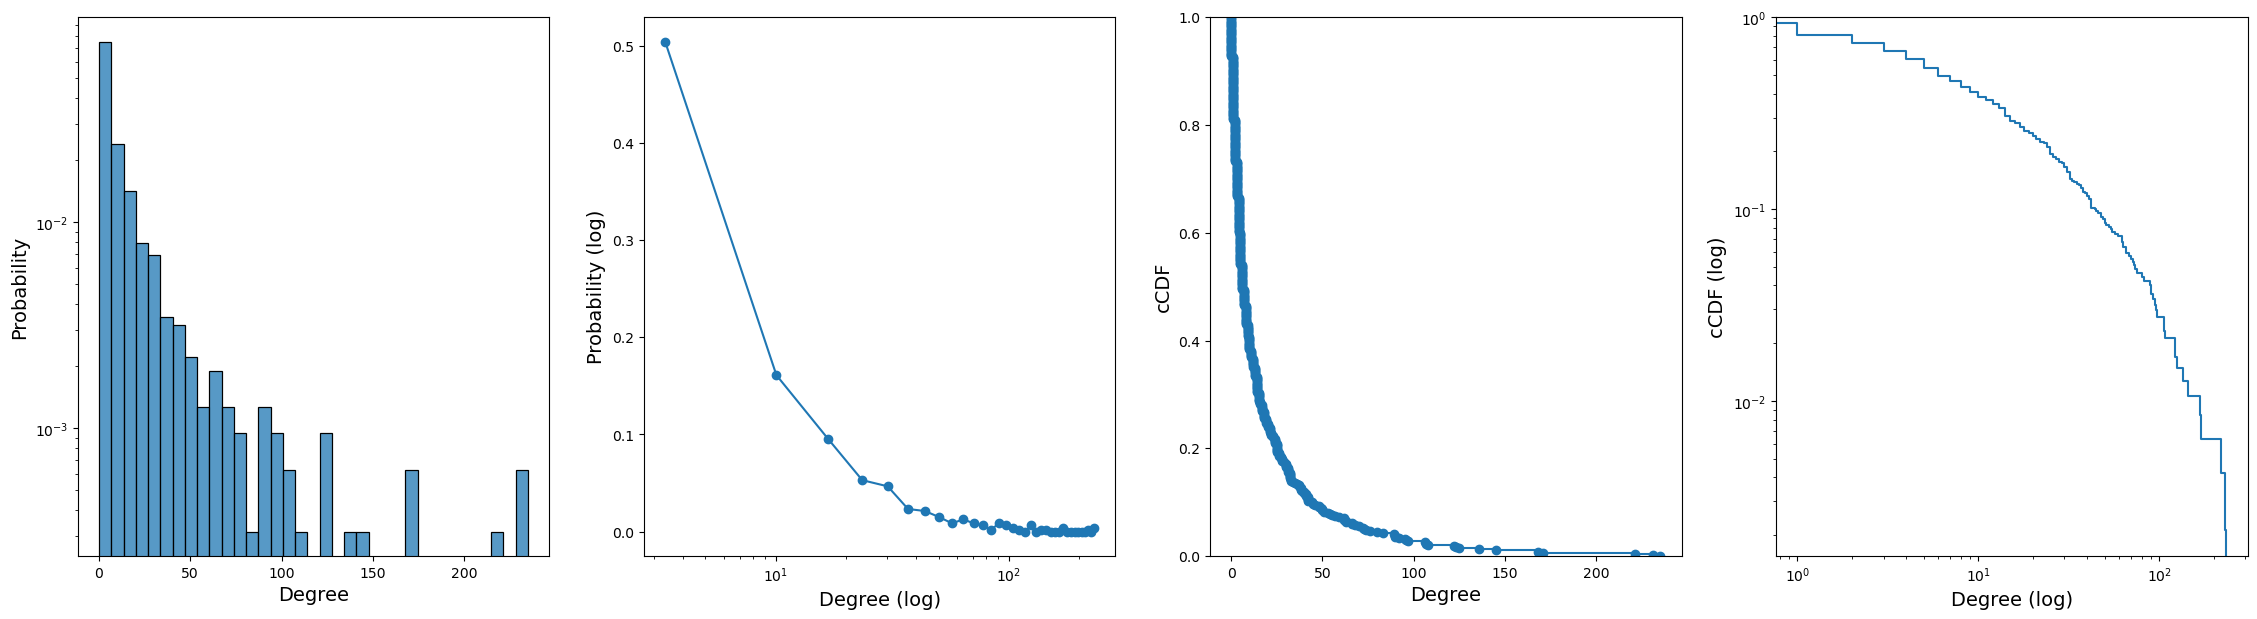

In [607]:
reload(nxt)
nxt.plot_degree_distribution(G2, type="in",path="../outputs/in-degree_distribution.jpg")
nxt.plot_degree_distribution(G2, type="out",path="../outputs/out-degree_distribution.jpg")

## 2.1 Employee Turnover Rate

$\text{turnover} = \dfrac{\text{sum(weights of all out-edges)}}{\text{sum(weights of all in-edges)}}$

- If turnover_rate is greater than 1, it means that
- If turnover_rate is less than 1, it means that
- If turnover_rate is equal to 1, it means that
- If turnover_rate is inf, it means that 

In [565]:
turnover_rate = []
weight_out = []
weight_in = []

for node in G2.nodes:
    sum_weight_out = sum([data['weight'] for _,_,data in G2.out_edges(node, data=True)])
    sum_weight_in = sum([data['weight'] for _,_,data in G2.in_edges(node, data=True)])
    turnover_rate.append(sum_weight_out/sum_weight_in)
    weight_out.append(sum_weight_out)
    weight_in.append(sum_weight_in)

df_turnover = pd.DataFrame({"occ":list(G2.nodes), "sum_weight_out":weight_out, "sum_weight_in":weight_in, "turnover_rate":turnover_rate})

df_occ = pd.read_csv("../data/original/2002-census-occupation-codes.csv")
joined = pd.merge(df_turnover, df_occ, on='occ', how='inner')
joined.sort_values(by="turnover_rate",ascending=False,inplace=True)
joined.to_csv("../data/analyzed/turnover_rate.csv", index=False)

C:\Users\wxl\AppData\Local\Temp\ipykernel_684\1878944637.py:8: RuntimeWarning:

divide by zero encountered in scalar divide



In [608]:
df_turnover = pd.read_csv("../data/analyzed/turnover_rate.csv")

hover_text = []
for _, row in df_turnover.iterrows():
    hover_text.append(('occ: {occ}<br>'+
                      'Outflow: {outflow}<br>'+
                      'Inflow: {inflow}<br>'+
                      'Turnover Rate: {turnover_rate}').format(occ=row["occ"],
                                            outflow=row['sum_weight_out'],
                                            inflow=row['sum_weight_in'],
                                            turnover_rate=row['turnover_rate']))

fig = go.Figure(
    data=go.Scatter(
        x = df_turnover["sum_weight_in"],
        y = df_turnover["sum_weight_out"],
        mode='markers',
        marker_size = df_turnover["turnover_rate"]*15,
        text=hover_text,
        hoverinfo='text',
    ))

fig.show()

In [567]:
df = pd.read_csv("../data/processed/drop_columns.csv")
df = df.loc[:, ['startingocc','startingsector']]
df.drop_duplicates(inplace=True)
df.rename(columns={"startingocc":"occ"}, inplace=True)

In [568]:
high_turnover_rate = df_turnover[df_turnover["turnover_rate"]>1].sort_values(by="turnover_rate",ascending=False)
high_turnover_rate

occ  sum_weight_out  sum_weight_in  turnover_rate  \
0    9330               1              0            inf   
4    9730               2              0            inf   
6    9560               5              0            inf   
5    3750               2              0            inf   
1    8440               1              0            inf   
..    ...             ...            ...            ...   
100  5310              50             47       1.063830   
101  5020              17             16       1.062500   
102  3740              20             19       1.052632   
103  8740              97             93       1.043011   
104  4000              38             37       1.027027   

                                            occupation  
0                                       Ship engineers  
4                                Shuttle car operators  
6                            Hoist and winch operators  
5                                      Fire inspectors  
1                     Fabric and apparel patternmakers  
..                                                 ...  
100          Interviewers, except eligibility and loan  
101                                Telephone operators  
102                                      Fire fighters  
103  Inspectors, testers, sorters, samplers, and we...  
104                               Chefs and head cooks  

[105 rows x 5 columns]

In [569]:
temp = df.merge(high_turnover_rate, on="occ", how='inner')
cnt = temp.groupby(by=["startingsector"],as_index=True)["startingsector"].count()
cnt

startingsector
Construction            1
Engineer/Sci/Arch       1
Healthcare              1
Maintenance/Repair      3
Mgmt/Biz/Financial      1
Office & Admin Sppt     8
Personal Service       10
Production             32
Protective Services     8
Sales                  10
Transportation         30
Name: startingsector, dtype: int64

In [570]:
high_turnover_rate_noninf = high_turnover_rate[~np.isinf(high_turnover_rate["turnover_rate"])]
high_turnover_rate_noninf

occ  sum_weight_out  sum_weight_in  turnover_rate  \
7    9520              17              2       8.500000   
8    9420               6              1       6.000000   
9    9350              63             11       5.727273   
10   9630              44              8       5.500000   
11   8130               5              1       5.000000   
..    ...             ...            ...            ...   
100  5310              50             47       1.063830   
101  5020              17             16       1.062500   
102  3740              20             19       1.052632   
103  8740              97             93       1.043011   
104  4000              38             37       1.027027   

                                            occupation  
7    Dredge, excavating, and loading machine operators  
8                        Other transportation workers   
9                               Parking lot attendants  
10                      Machine feeders and offbearers  
11                                 Tool and die makers  
..                                                 ...  
100          Interviewers, except eligibility and loan  
101                                Telephone operators  
102                                      Fire fighters  
103  Inspectors, testers, sorters, samplers, and we...  
104                               Chefs and head cooks  

[98 rows x 5 columns]

In [571]:
temp = df.merge(high_turnover_rate_noninf, on="occ", how='inner')
cnt = temp.groupby(by=["startingsector"],as_index=True)["startingsector"].count()
cnt

startingsector
Construction            1
Engineer/Sci/Arch       1
Healthcare              1
Maintenance/Repair      3
Mgmt/Biz/Financial      1
Office & Admin Sppt     8
Personal Service       10
Production             31
Protective Services     6
Sales                  10
Transportation         26
Name: startingsector, dtype: int64

In [573]:
inf_turnover_rate = df_turnover[df_turnover["sum_weight_in"]==0].sort_values(by="turnover_rate",ascending=True)
inf_turnover_rate

occ  sum_weight_out  sum_weight_in  turnover_rate  \
0  9330               1              0            inf   
1  8440               1              0            inf   
2  9260               3              0            inf   
3  3840               3              0            inf   
4  9730               2              0            inf   
5  3750               2              0            inf   
6  9560               5              0            inf   

                                          occupation  
0                                     Ship engineers  
1                   Fabric and apparel patternmakers  
2  Subway, streetcar, and other rail transportati...  
3                        Parking enforcement workers  
4                              Shuttle car operators  
5                                    Fire inspectors  
6                          Hoist and winch operators

In [574]:
low_turnover_rate = df_turnover[(df_turnover["turnover_rate"]<1)&(df_turnover["turnover_rate"]>0)].sort_values(by="turnover_rate",ascending=True)
low_turnover_rate

occ  sum_weight_out  sum_weight_in  turnover_rate  \
434   110               1             21       0.047619   
433  2100               1             14       0.071429   
431  1300               1              9       0.111111   
432   350               2             18       0.111111   
430   130               2             17       0.117647   
..    ...             ...            ...            ...   
144  8960             168            178       0.943820   
143  4010             151            159       0.949686   
142  7700              46             48       0.958333   
141  7000              25             26       0.961538   
140   620              64             65       0.984615   

                                            occupation  
434          Computer and information systems managers  
433                                            Lawyers  
431                           Architects, except naval  
432               Medical and health services managers  
430                           Human resources managers  
..                                                 ...  
144                      Production workers, all other  
143  First-line supervisors/managers of food prepar...  
142  First-line supervisors/managers of production ...  
141  First-line supervisors/managers of mechanics, ...  
140  Human resources, training, and labor relations...  

[295 rows x 5 columns]

In [575]:
temp = df.merge(low_turnover_rate, on='occ', how='inner')
cnt = temp.groupby(by=["startingsector"],as_index=True)["startingsector"].count()
cnt

startingsector
Agriculture                    3
Arts and Entertainment        11
Construction                  22
Educ/Legal/Social Services     6
Engineer/Sci/Arch              4
Healthcare                    13
IT                             1
Maintenance/Repair            21
Mgmt/Biz/Financial             7
Office & Admin Sppt           33
Personal Service              18
Production                    17
Protective Services            4
Transportation                 1
Name: startingsector, dtype: int64

In [576]:
zero_turnover_rate = df_turnover[df_turnover["turnover_rate"]==0].sort_values(by="turnover_rate",ascending=True)
zero_turnover_rate

occ  sum_weight_out  sum_weight_in  turnover_rate  \
435  1720               0              2            0.0   
466   820               0              4            0.0   
465  3230               0              1            0.0   
464  3160               0              1            0.0   
463  3250               0              2            0.0   
462  1800               0              1            0.0   
461  1450               0              1            0.0   
460  6820               0              1            0.0   
459   400               0              1            0.0   
458  4930               0              1            0.0   
457  6020               0              3            0.0   
456  6700               0              4            0.0   
455  7430               0              2            0.0   
454  8410               0              4            0.0   
453  1420               0              1            0.0   
452  7930               0              4            0.0   
451  8600               0              1            0.0   
450  5500               0              2            0.0   
436  3260               0              2            0.0   
437  3050               0              7            0.0   
438  1840               0              1            0.0   
439  8360               0              1            0.0   
440  9800               0              4            0.0   
441  3220               0              2            0.0   
467  3150               0              2            0.0   
442  6740               0              1            0.0   
444  7360               0              5            0.0   
445  8150               0              1            0.0   
446  6920               0              1            0.0   
447  1820               0              4            0.0   
448   320               0              1            0.0   
449  3900               0              1            0.0   
443  1640               0              1            0.0   
468  7100               0              1            0.0   

                                            occupation  
435                  Chemists and materials scientists  
466                                    Budget analysts  
465                       Speech-language pathologists  
464                                Physical therapists  
463                                      Veterinarians  
462                                         Economists  
461                                Materials engineers  
460                 Earth drillers, except oil and gas  
459               Postmasters and mail superintendents  
458                                    Sales engineers  
457                                    Animal breeders  
456                  Elevator installers and repairers  
455       Precision instrument and equipment repairers  
454  Textile knitting and weaving machine setters, ...  
453                            Environmental engineers  
452  Forging machine setters, operators, and tender...  
451  Power plant operators, distributors, and dispa...  
450                           Cargo and freight agents  
436  Health diagnosing and treating practitioners, ...  
437                                        Pharmacists  
438                        Urban and regional planners  
439  Textile bleaching and dyeing machine operators...  
440  Military officer special and tactical operatio...  
441                             Respiratory therapists  
467                            Occupational therapists  
442  Rail-track laying and maintenance equipment op...  
444                                        Millwrights  
445  Heat treating equipment setters, operators, an...  
446                           Roustabouts, oil and gas  
447                                      Psychologists  
448                                  Funeral directors  
449                             Animal control workers  
443              Conservation scientists and foresters  
46

In [577]:
temp = df.merge(zero_turnover_rate, on="occ", how='inner')
cnt = temp.groupby(by=["startingsector"],as_index=True)["startingsector"].count()
cnt

startingsector
Construction           2
Healthcare             1
Maintenance/Repair     3
Office & Admin Sppt    2
Personal Service       1
Production             4
Protective Services    1
Name: startingsector, dtype: int64

## 2.2 Community Detection

Define a function for community detection:

In [462]:
def community_detection(G, method="louvain"):

    if method=="girvan_newman":
        partition = nx.community.girvan_newman(G)
    elif method=="greedy":
        partition_frozenset = nx.community.greedy_modularity_communities(G, weight="weight")
        partition = []
        for i in partition_frozenset:
            partition.append(set(i))
    elif method=='louvain':
        partition = nx.community.louvain_communities(G, weight="weight")

    modularity = nx.community.quality.modularity(G, partition)

    # print("Partition:\n", partition, sep="")
    print("\nNumber of communities:", len(partition))
    print("\nmodularity =", modularity)

    return partition

### 2.2.1 Greedy modularity optimization

Get the maximum modularity partition:

In [463]:
partition_greedy = community_detection(G2, method="greedy")


Number of communities: 6

modularity = 0.21357984457851287


### 2.2.2 Louvain algorithm

In [476]:
partition_Lou = community_detection(G2, method="louvain")


Number of communities: 18

modularity = 0.212133558715714


In [477]:
nodes_in_giant_comp = sorted(nx.strongly_connected_components(G2), key=len, reverse=True)[0]
strongly_gcc = nx.subgraph(G2, nodes_in_giant_comp)
# strongly_gcc.edges(data=True)

In [478]:
len(list(strongly_gcc.nodes))

429

Nodes not included in the maximum strongly connected componet:

In [480]:
len(set(G2.nodes)-set(strongly_gcc.nodes))

43

# 3. Un-directed Network excluding 'Unemployed' and 'Student'

In [481]:
G3 = nx.Graph()

for i in range(df_origin2.shape[0]):
    u=df_origin2.loc[i,'source']
    v=df_origin2.loc[i,'target']
    w=df_origin2.loc[i,'weight']
    if G3.has_edge(u, v):
        G3[u][v]['weight'] += w
    else:
        G3.add_edge(u, v, weight=w)

In [482]:
nxt.network_summary(G3)

GENERAL
	number of nodes: 472
	number of edges: 6582
	is_directed: False
	is_weighted: True
	number_connected_components 1
	number of triangle:  472
	density: 0.05921407751268488
	average_clustering coefficient:  0.4487382513305618
	degree_assortativity_coefficient:  -0.23209907704903737
	is_tree: False
	diameter: 5
	radius: 3
	average_shortest_path_length:  2.2677048472417143
DEGREE (NORMALIZED)
	min: 0.0021231422505307855
	mean: 0.05921407751268487
	median: 0.029723991507430998
	max: 0.524416135881104
	top nodes: [4760, 9620, 4720, 4110, 9130, 5620, 4700, 5240, 4020, 5700, 6260, 5400]
	           [0.524416135881104, 0.5159235668789809, 0.5010615711252654, 0.4288747346072187, 0.38641188959660294, 0.37367303609341823, 0.3651804670912951, 0.35881104033970274, 0.3227176220806794, 0.31210191082802546, 0.29936305732484075, 0.28874734607218683]
	tail nodes: [3860, 4930, 400, 1800, 3900, 8360, 6740, 1640, 8150, 9330]
	           [0.0021231422505307855, 0.0021231422505307855, 0.00212314225053

In [483]:
partition_greedy_undirected = community_detection(G3, method="greedy")


Number of communities: 6

modularity = 0.21299483255361526


In [484]:
partition_Lou_undirected = community_detection(G3, method="louvain")


Number of communities: 7

modularity = 0.21049248313473481


## 2.3 Plot communities

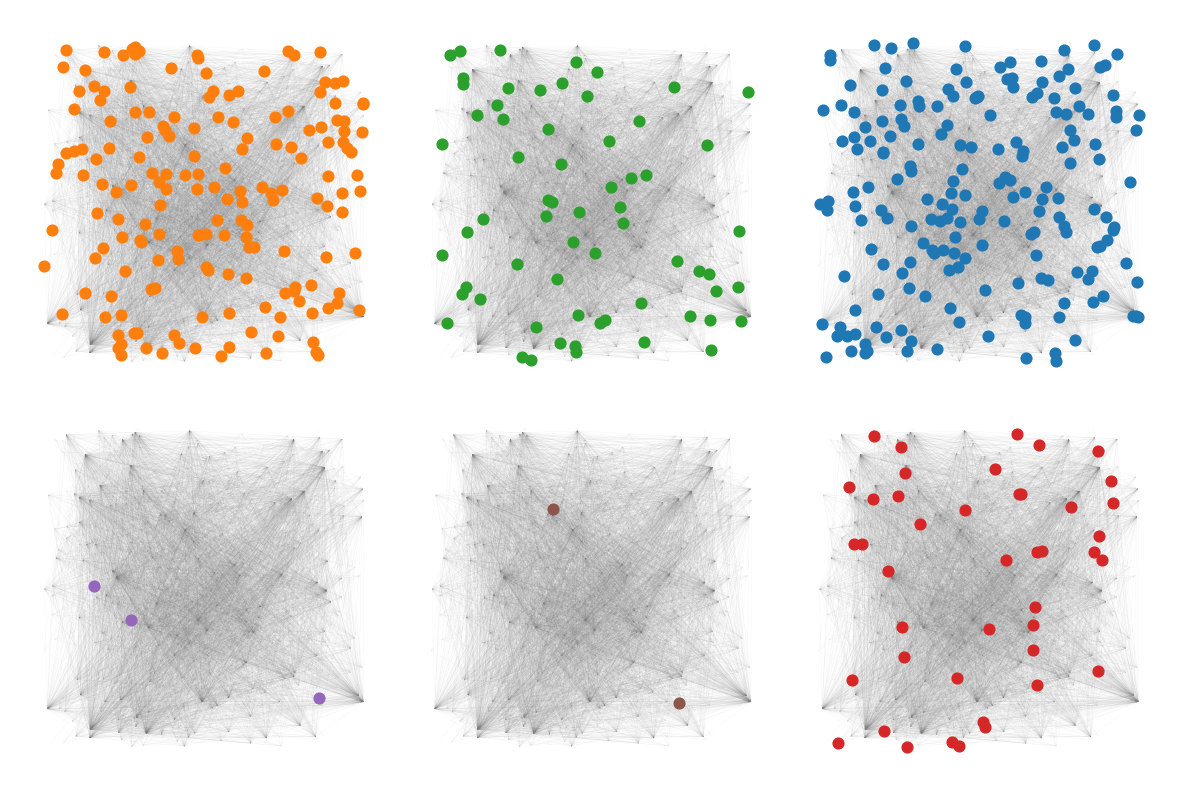

In [604]:
def plot_partition(G,partition):

    #BUILD PARTITION MAP
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    
    #PLOT
    fig, axs = plt.subplots(len(partition)//3,3)  # (,3)
    fig.set_size_inches(15, 5*(len(partition)//3))

    pos=nx.random_layout(G)
    i=0
    for community in set(partition_map.values()):
        nodes = [node for node in partition_map.keys() if partition_map[node] == community]
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_size=60, node_color=f"C{community}", ax=axs[i//3,i%3-1])
        nx.draw_networkx_edges(G, 
                            pos,
                            width=0.2,
                            alpha=0.1,
                            edge_color="gray",
                            ax=axs[i//3,i%3-1])
        # nx.draw_networkx_labels(G, pos, ax=axs[i//3,i%3-1])
        i+=1

    # Don't show the axes
    for ax in axs.ravel():
        ax.set_axis_off()

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0, hspace=0)

    plt.savefig("../outputs/greedy_partition.png",dpi=400, bbox_inches='tight')

    plt.show()


plot_partition(G3, partition_greedy)


In [487]:
list(dict(sorted(nx.edge_betweenness_centrality(G3).items(), key=lambda item: item[1], reverse=True)).items())[0:10]

[((8740, 8130), 0.005213918698484565),
 ((6440, 9200), 0.005200367573463878),
 ((1610, 4110), 0.004737178058585788),
 ((2340, 9260), 0.0045792987099003675),
 ((7720, 7110), 0.004237288135593222),
 ((5300, 3230), 0.004237288135593221),
 ((1040, 5830), 0.004237288135593221),
 ((9620, 3900), 0.004237288135593221),
 ((9620, 8360), 0.004237288135593221),
 ((5620, 320), 0.004237288135593221)]

# Communities

In [ ]:
df = pd.read_csv("../data/processed/drop_columns.csv")
df = df.loc[:, ['startingocc','startingsector']]
df.drop_duplicates(inplace=True)


In [518]:
for i in range(len(partition_greedy)):
    temp = df.merge(pd.DataFrame(partition_greedy[i],columns=["startingocc"]), on="startingocc", how='inner')
    cnt = temp.groupby(by=["startingsector"],as_index=True)["startingsector"].count()
    print("For community {}:\n".format(i), cnt,'\n\n')

For community 0:
 startingsector
Agriculture                1
Arts and Entertainment     2
Construction              25
Engineer/Sci/Arch          1
Maintenance/Repair        25
Mgmt/Biz/Financial         1
Office & Admin Sppt        5
Personal Service           7
Production                47
Protective Services        9
Sales                      1
Transportation            23
Name: startingsector, dtype: int64 


For community 1:
 startingsector
Arts and Entertainment         3
Educ/Legal/Social Services     6
Healthcare                     3
Mgmt/Biz/Financial             7
Office & Admin Sppt           37
Personal Service              17
Production                     4
Protective Services            3
Sales                          9
Transportation                 1
Name: startingsector, dtype: int64 


For community 2:
 startingsector
Agriculture                1
Arts and Entertainment     6
Engineer/Sci/Arch          4
IT                         2
Maintenance/Repair         4
Of

# Skill importance

In [488]:
skill = pd.read_csv("../data/processed/skills_importance.csv")
skill.head(3)

occ  license  isaprobsolv  isa2waycomm  isateach  isamgppl  isagrossmotor  \
0  2910        1       3.0600      3.72000    2.8750  2.960000       1.792222   
1  2700        0       2.9400      3.93750    2.7500  2.753333       1.903333   
2  2920        1       3.2375      3.59375    2.5325  2.873334       1.561111   

   isaequiprepmnt  isasensperc  isaquant  isafocattn  isaservpersd  \
0           1.645        1.602      2.00       2.628       2.28000   
1           1.000        1.176      1.04       2.274       2.09250   
2           1.960        1.410      1.98       2.900       2.12625   

   isacreatvty  isafinemotor  
0     3.540000         3.072  
1     3.123333         1.800  
2     3.455000         2.950

In [489]:
skill.describe()

occ     license  isaprobsolv  isa2waycomm    isateach  \
count   337.000000  337.000000   337.000000   337.000000  337.000000   
mean   5953.531157    0.673591     3.186541     3.443953    2.534602   
std    2440.358396    0.469596     0.303937     0.387893    0.428069   
min     100.000000    0.000000     2.500000     2.562500    1.435000   
25%    4210.000000    0.000000     2.958333     3.091250    2.217500   
50%    6210.000000    1.000000     3.125000     3.405000    2.502500   
75%    8040.000000    1.000000     3.395000     3.803333    2.815000   
max    9750.000000    1.000000     3.990000     4.310000    4.000000   

         isamgppl  isagrossmotor  isaequiprepmnt  isasensperc    isaquant  \
count  337.000000     337.000000      337.000000   337.000000  337.000000   
mean     2.822669       2.035782        1.996781     1.630976    2.362968   
std      0.338327       0.505618        0.682489     0.504931    0.401216   
min      2.000000       1.013333        1.000000     1.000000    1.040000   
25%      2.626666       1.721111        1.353333     1.100000    2.054444   
50%      2.750000       2.124445        1.941146     1.633333    2.301667   
75%      2.928333       2.376111        2.500000     2.000000    2.645000   
max      3.960000       3.686667        3.790834     3.225000    3.586667   

       isafocattn  isaservpersd  isacreatvty  isafinemotor  
count  337.000000    337.000000   337.000000    337.000000  
mean     2.728633      2.105650     2.633380      2.830386  
std      0.267265      0.313215     0.368843      0.567846  
min      1.726000      1.372500     1.790000      1.300000  
25%      2.550000      1.872500     2.373333      2.350000  
50%      2.737000      2.095000     2.665556      2.980500  
75%      2.900000      2.312500     2.886667      3.274667  
max      3.624000      2.872500     3.843333      3.902000

Normalization

In [490]:
skill_copy = skill.copy()

for i in range(2,skill_copy.shape[1]):
    # Create the MinMaxScaler object
    scaler = MinMaxScaler()
    # Fit and transform each column
    skill_copy.iloc[:,i] = scaler.fit_transform(np.array(skill_copy.iloc[:,i]).reshape(-1, 1))

skill_copy.sort_values(by="occ",ascending=True,inplace=True,ignore_index=True)
skill_copy

occ  license  isaprobsolv  isa2waycomm  isateach  isamgppl  \
0     100        1     0.656599     0.805436  0.610136  0.872449   
1     140        1     0.886092     0.798045  0.736517  0.842970   
2     200        1     0.840045     0.744874  0.658869  0.786848   
3     210        1     0.840045     0.744874  0.658869  0.786848   
4     310        1     0.642058     0.751073  0.658869  0.828231   
..    ...      ...          ...          ...       ...       ...   
332  9650        1     0.488814     0.321411  0.333983  0.319161   
333  9720        1     0.294183     0.286123  0.171540  0.340136   
334  9730        0     0.085011     0.161660  0.122807  0.149660   
335  9740        0     0.364653     0.303290  0.415205  0.489796   
336  9750        0     0.224832     0.232475  0.269006  0.319728   

     isagrossmotor  isaequiprepmnt  isasensperc  isaquant  isafocattn  \
0         0.171654        0.134368     0.224719  0.589005    0.473130   
1         0.219174        0.434159     0.181423  0.823517    0.682122   
2         0.341369        0.407883     0.408390  0.688045    0.540218   
3         0.341369        0.407883     0.408390  0.688045    0.540218   
4         0.342477        0.275903     0.000000  0.738220    0.525817   
..             ...             ...          ...       ...         ...   
332       0.481851        0.547029     0.442247  0.507417    0.623112   
333       0.550291        0.462825     0.661573  0.133508    0.446786   
334       0.364505        0.372649     0.405393  0.197644    0.146470   
335       0.643807        0.477755     0.606742  0.589005    0.696523   
336       0.504156        0.425201     0.506067  0.393325    0.421496   

     isaservpersd  isacreatvty  isafinemotor  
0        0.668333     0.589286      0.316680  
1        0.672500     0.606061      0.480528  
2        0.661111     0.590368      0.608506  
3        0.661111     0.590368      0.608506  
4        0.855000     0.407468      0.558032  
..            ...          ...           ...  
332      0.252222     0.332251      0.727902  
333      0.420000     0.284091      0.681015  
334      0.000000     0.082792      0.616449  
335      0.230000     0.426948      0.797848  
336      0.115000     0.254870      0.707148  

[337 rows x 14 columns]

In [491]:
partition_map = {}
for idx, cluster_nodes in enumerate(partition_greedy):
    for node in cluster_nodes:
        partition_map[node] = idx
partition_map = dict(sorted(partition_map.items(), key=lambda x: x[0]))
    
occ=[]
cluster_id=[]
for node, community in partition_map.items():
    if node in list(skill_copy.loc[:,"occ"]):
        occ.append(node)
        cluster_id.append(community)

skill_copy = skill_copy[skill_copy['occ'].isin(occ)]
    

Apply K-means to the table of skill importance:

In [492]:
X=np.array(skill_copy.iloc[:,1:])

kmeans = KMeans(n_clusters=len(partition_greedy), random_state=0, n_init="auto").fit(X)
kmeans_labels = kmeans.labels_
kmeans_labels

d:\Program Files (x86)\Anaconda\envs\anly645\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



array([2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 4, 4, 2, 5, 5, 4,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 4, 2, 2, 2, 5, 2, 2, 2, 5, 2, 1,
       2, 5, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 4, 4, 4, 5, 5, 1, 2, 0,
       5, 5, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 4, 4, 5, 2, 2, 5, 0, 2,
       0, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 4, 1, 2, 2, 2,
       2, 2, 4, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 0, 2, 0, 1, 3, 3, 1, 3, 0, 3, 1, 4, 2, 0,
       4, 2, 0, 1, 0, 4, 0, 5, 4, 5, 3, 5, 0, 0, 0, 0, 3, 5, 0, 0, 0, 5,
       0, 3, 0, 5, 2, 5, 0, 5, 0, 5, 5, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 3, 0, 3, 4, 5, 0, 0, 0, 5, 5, 0,
       0, 4, 0, 0, 0, 0, 0, 3, 3, 3, 4, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 0, 0,
       0, 0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 5, 5, 0, 0, 0, 0, 5, 0, 5, 5, 5, 5, 5, 3,

In [493]:
# Calculate the Normalized Mutual Information (NMI)
nmi_score = normalized_mutual_info_score(cluster_id, kmeans_labels)
print("Normalized Mutual Information (NMI):", nmi_score)


Normalized Mutual Information (NMI): 0.2197996822892952


In [ ]:
# skill_copy.reset_index(inplace=True)
kmeans_partition = [set() for _ in range(6)]

for i in range(len(kmeans_labels)):
    kmeans_partition[kmeans_labels[i]].add(skill_copy["occ"][i])

kmeans_partition

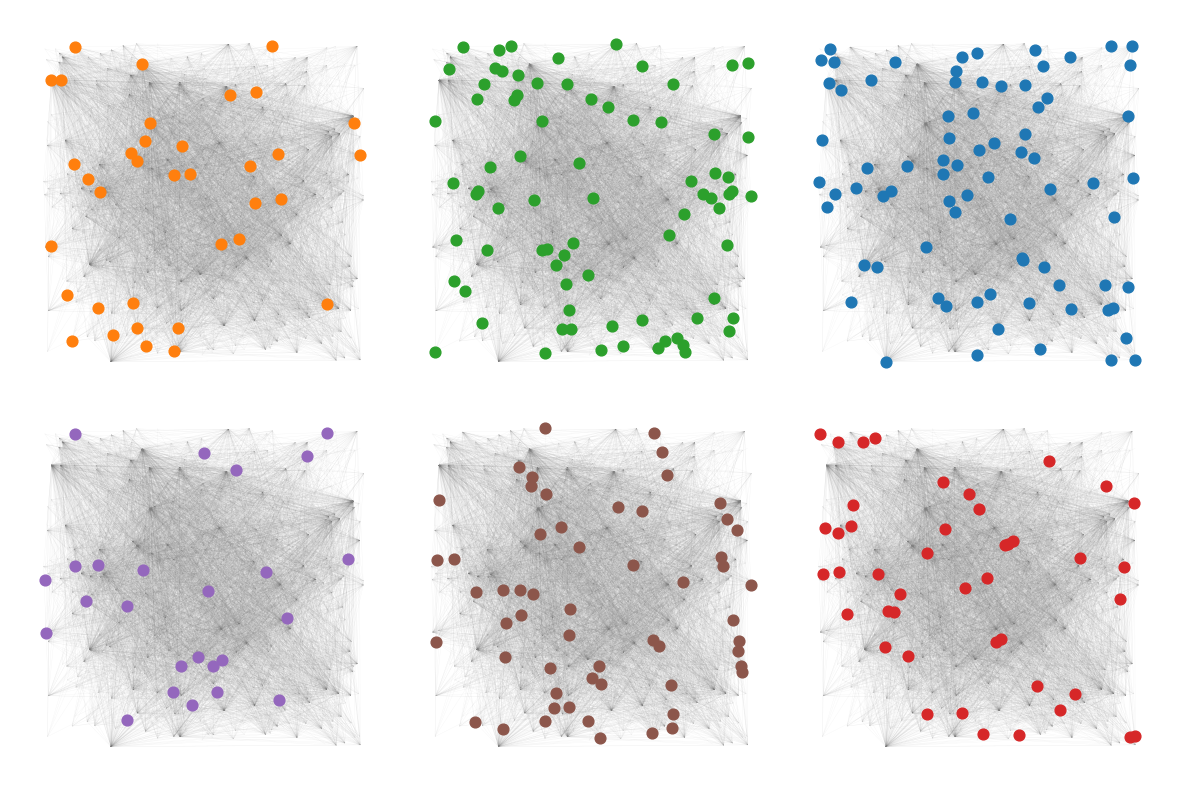

In [603]:
plot_partition(G3, kmeans_partition)

In [621]:
for i in range(len(kmeans_partition)):
    temp = df.merge(pd.DataFrame(kmeans_partition[i],columns=["startingocc"]), on="startingocc", how='inner')
    cnt = temp.groupby(by=["startingsector"],as_index=True)["startingsector"].count()
    print("For community {}:\n".format(i), cnt,'\n\n')

For community 0:
 startingsector
Construction            154
Maintenance/Repair       53
Office & Admin Sppt     205
Personal Service        270
Production              440
Protective Services      11
Transportation         3109
Name: startingsector, dtype: int64 


For community 1:
 startingsector
All other                 1
Healthcare              170
Mgmt/Biz/Financial        7
Office & Admin Sppt     659
Personal Service        571
Protective Services      45
Sales                  3320
Name: startingsector, dtype: int64 


For community 2:
 startingsector
All other                      85
Construction                    4
Educ/Legal/Social Services    172
Engineer/Sci/Arch              11
Healthcare                    314
Mgmt/Biz/Financial            100
Office & Admin Sppt           479
Personal Service              824
Production                     17
Protective Services           271
Sales                         598
Name: startingsector, dtype: int64 


For community 3:
 sta

# Some Occupation in a Specific Field

In [494]:
# Identify the nodes I want to keep
nodes_to_keep = [1000,1010,1020,1040,1060,1100,1110,1200,1210,1220,1230,1240]

# Find the neighborhood nodes for each of the specified nodes
neighborhood_nodes = set()
for node in nodes_to_keep:
    if node in list(G2.nodes):
        neighborhood_nodes |= set(G2.neighbors(node))
    else:
        nodes_to_keep.remove(node)

# Create a subgraph containing the specified nodes and their neighborhood nodes
G_computer = G2.subgraph(nodes_to_keep + list(neighborhood_nodes))

In [495]:
nxt.network_summary(G_computer)

GENERAL
	number of nodes: 78
	number of edges: 1206
	is_directed: True
	is_weighted: True
 is_strongly_connected: False
 is_weakly_connected: True
IN-DEGREE (NORMALIZED)
	min: 0.012987012987012988
	mean: 0.20079920079920077
	median: 0.18181818181818182
	max: 0.5584415584415585
	top nodes: [4760, 4110, 4720, 5240, 5620, 4020, 5400, 5700, 2340, 6260, 4250, 9130]
	           [0.5584415584415585, 0.5324675324675325, 0.5064935064935066, 0.5064935064935066, 0.5064935064935066, 0.4545454545454546, 0.4415584415584416, 0.38961038961038963, 0.37662337662337664, 0.35064935064935066, 0.35064935064935066, 0.33766233766233766]
	tail nodes: [6530, 1410, 8250, 9820, 2860, 830, 1220, 5830, 1230, 300]
	           [0.06493506493506494, 0.06493506493506494, 0.05194805194805195, 0.05194805194805195, 0.05194805194805195, 0.03896103896103896, 0.025974025974025976, 0.012987012987012988, 0.012987012987012988, 0.012987012987012988]
OUT-DEGREE (NORMALIZED)
	min: 0.0
	mean: 0.20079920079920077
	median: 0.15584415

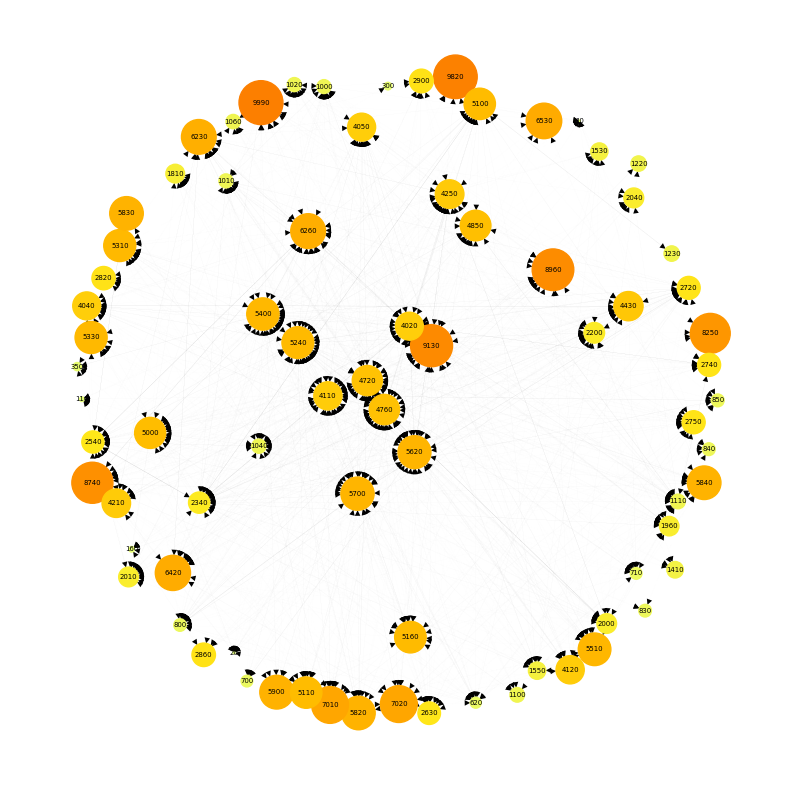

In [202]:
cmap_n = plt.colormaps.get_cmap("Wistia")

betweenness_centrality = nx.betweenness_centrality(G_computer)
closeness_centrality = nx.closeness_centrality(G_computer)

colors_n = [cmap_n(u/(0.01+max(betweenness_centrality))) for u in betweenness_centrality]
node_size = [1000*u/(0.01+max(closeness_centrality)) for u in closeness_centrality]
edge_thickness = [(val[2]/1000)*2 for val in G2.edges.data("weight")]

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

nx.draw(
        G_computer,
	    node_color=colors_n,
	    node_size=node_size, 
	    width=edge_thickness,
	    with_labels=True,
        font_color="black",
        font_size=5,
	    pos=nx.spring_layout(G_computer, k=50*1./np.sqrt(len(G_computer.nodes)), iterations=100),
        ax=ax
    )
plt.show()

Get the precedents and successors of a specific occupation

In [636]:
def plot_specified_occ(G, occ:list, direction=['out']):

    # Find the neighborhood nodes for each of the specified nodes
    neighborhood_nodes = set()
    for node in occ:
        if node in list(G.nodes):
            if "out" in direction:
                neighborhood_nodes |= set(G2.successors(node))
            if 'in' in direction:
                neighborhood_nodes |= set(G2.predecessors(node))
        else:
            occ.remove(node)

    # Create a subgraph containing the specified nodes and their neighborhood nodes
    occ_subgraph = G2.subgraph(occ + list(neighborhood_nodes))

    cmap_n = plt.colormaps.get_cmap("Wistia")

    betweenness_centrality = nx.betweenness_centrality(occ_subgraph)
    closeness_centrality = nx.closeness_centrality(occ_subgraph)
    out_degree = nx.out_degree_centrality(occ_subgraph)

    colors_n = [cmap_n(u/(0.01+max(out_degree))) for u in out_degree]
    node_size = [3000*u/(0.01+max(out_degree)) for u in out_degree]
    edge_thickness = [(val[2]/10) for val in occ_subgraph.edges.data("weight")]

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)

    nx.draw(
            occ_subgraph,
	        node_color=colors_n,
	        node_size=node_size, 
	        width=edge_thickness,
            arrowsize=5,
	        with_labels=True,
            font_color="black",
            font_size=12,
	        pos=nx.spring_layout(occ_subgraph, k=30*1./np.sqrt(len(occ_subgraph.nodes)), iterations=100),
            ax=ax
        )
    plt.show()

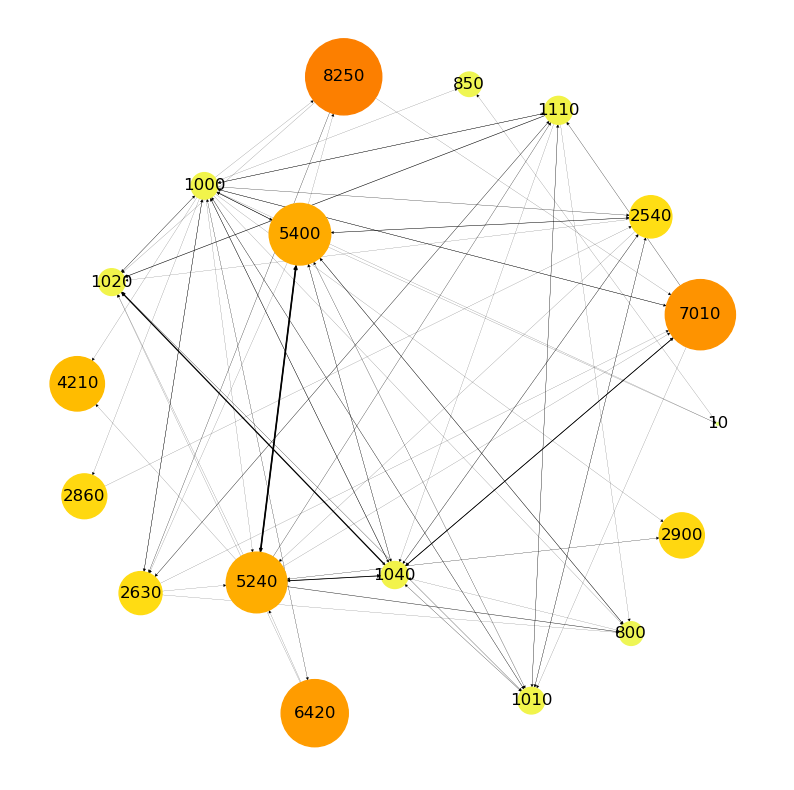

In [637]:
plot_specified_occ(G2, [1000])  # Computer scientists and systems analysts

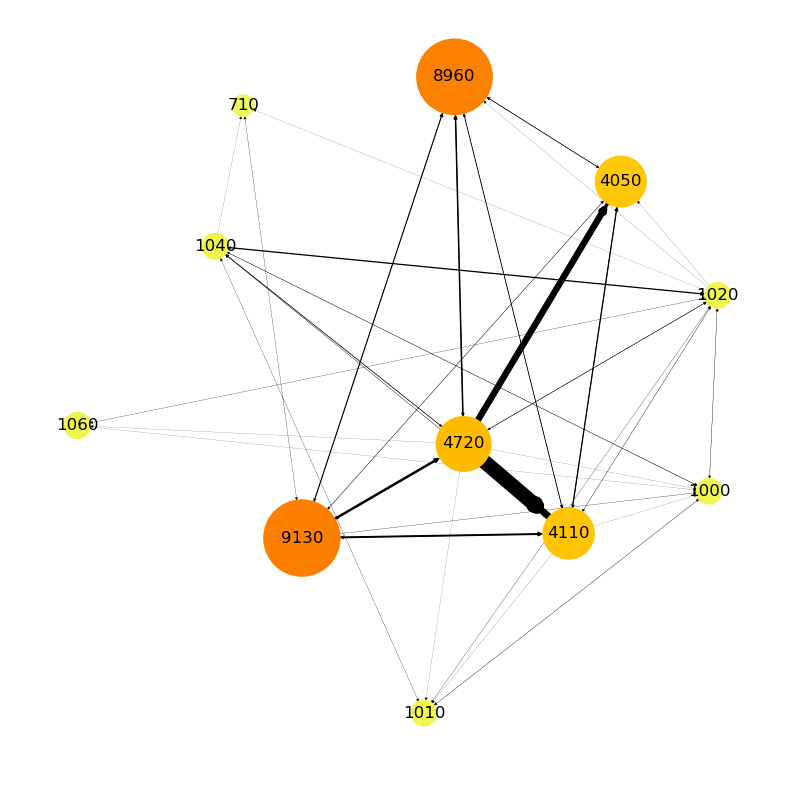

In [638]:
plot_specified_occ(G2, [1020])  # Computer software engineers

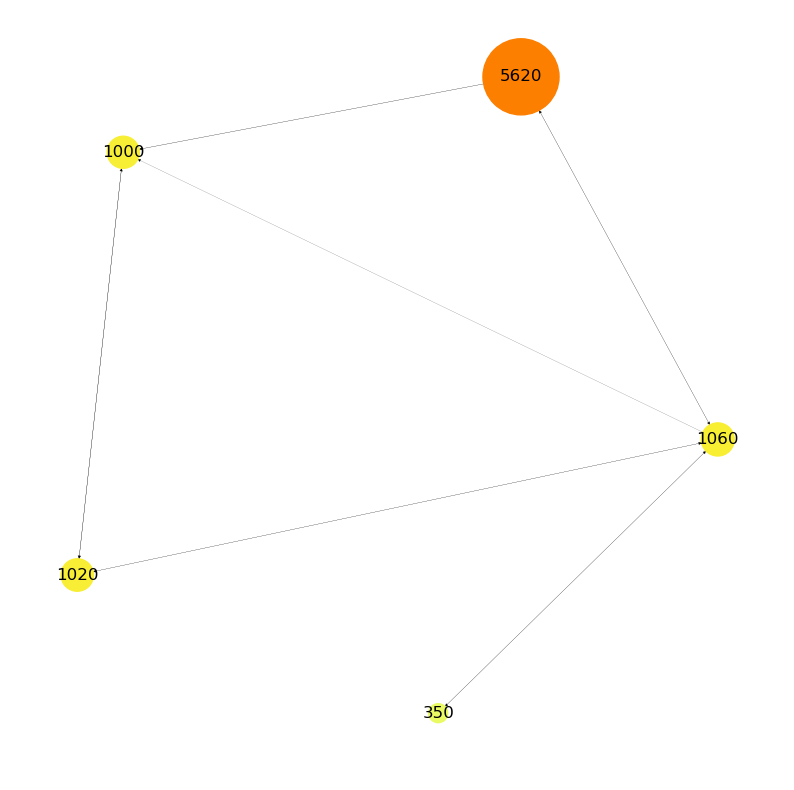

In [639]:
plot_specified_occ(G2, [1060])  # Database administrators

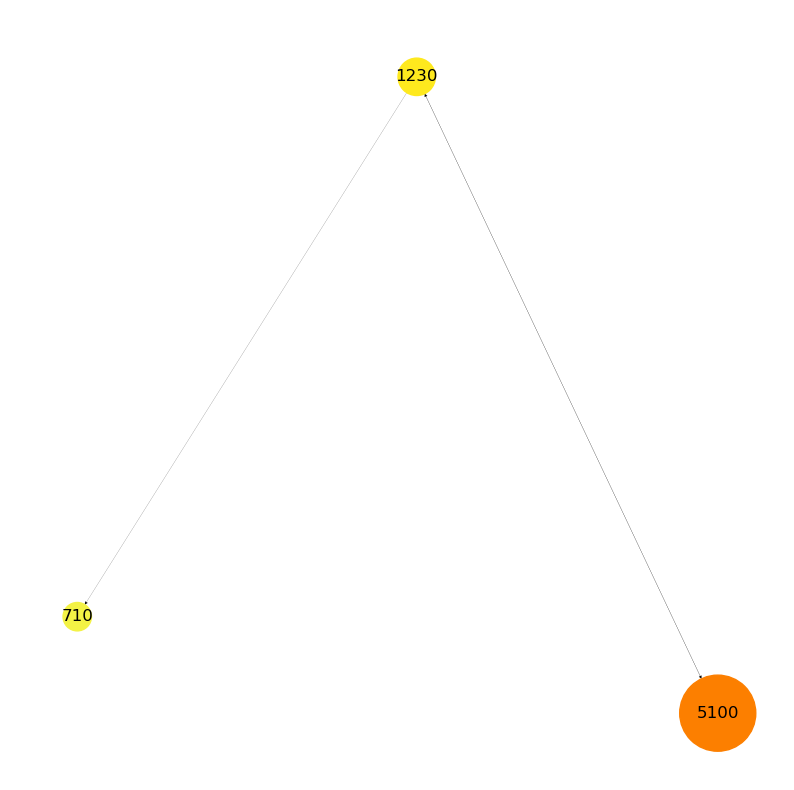

In [640]:
plot_specified_occ(G2, [1230])  # Statisticians

In [254]:
# Using shortest_path function
shortest_path = nx.shortest_path(G1, source='1010', target='6420', weight='weight')
print("Shortest path:", shortest_path)

# Using shortest_path_length function
shortest_path_length = nx.shortest_path_length(G1, source='1010', target='6420', weight='weight')
print("Shortest path length:", shortest_path_length)

Shortest path: ['1010', '1000', '6420']
Shortest path length: 2


core-periphery

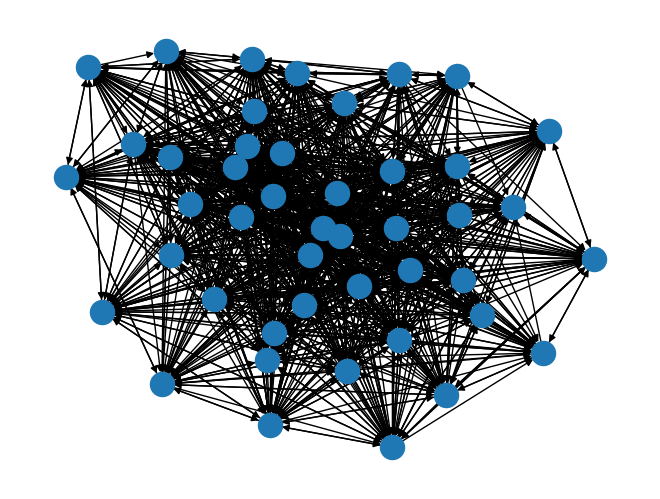

In [255]:
main_core = nx.k_core(G2)
nx.draw(main_core)

In [258]:
nxt.network_summary(main_core)

GENERAL
	number of nodes: 45
	number of edges: 1372
	is_directed: True
	is_weighted: True
	is_strongly_connected: True
	is_weakly_connected: True
IN-DEGREE (NORMALIZED)
	min: 0.4318181818181818
	mean: 0.692929292929293
	median: 0.6818181818181819
	max: 0.9772727272727273
	top nodes: [4110, 4760, 4720, 5240, 4600, 3600, 4020, 4030, 9620, 5400, 5620, 4220]
	           [0.9772727272727273, 0.9772727272727273, 0.9545454545454546, 0.9545454545454546, 0.8863636363636364, 0.8636363636363636, 0.8636363636363636, 0.8636363636363636, 0.8409090909090909, 0.8409090909090909, 0.7954545454545455, 0.7954545454545455]
	tail nodes: [8960, 4610, 2720, 4430, 4140, 6230, 9610, 4510, 9640, 4850]
	           [0.5681818181818182, 0.5681818181818182, 0.5681818181818182, 0.5681818181818182, 0.5454545454545454, 0.5454545454545454, 0.5227272727272727, 0.5, 0.4318181818181818, 0.4318181818181818]
OUT-DEGREE (NORMALIZED)
	min: 0.38636363636363635
	mean: 0.692929292929293
	median: 0.6818181818181819
	max: 1.0
	top 

In [259]:
min(list(dict(main_core.in_degree).values()))

19

In [260]:
max(list(dict(main_core.in_degree).values()))

43

In [267]:
list(nx.periphery(strongly_gcc))

[6100,
 60,
 1320,
 6800,
 2100,
 1460,
 1600,
 1650,
 9830,
 9820,
 1710,
 1930,
 1830,
 300,
 3710,
 3000,
 3860,
 4670]

# 0. Basic information

In [611]:
df = pd.read_csv("../data/processed/drop_columns.csv")
df.head(3)

r_id  ageyrs  startingocc          startingsector  endingocc  \
0   731032p    32.0         2910  Arts and Entertainment      340.0   
1  1522033p    26.0         2720  Arts and Entertainment        NaN   
2  2805030p    30.0         2910  Arts and Entertainment     2910.0   

       endingsector  abswagech3  sectorchgto_mgmt gender  Education at start  \
0  Personal Service    0.323076                 0      F                   1   
1      Not Employed         NaN                 0      F                   3   
2         All other    0.137892                 0      M                   1   

   Education at end Starting occupational cluster  \
0                 1                     All other   
1                 3                     All other   
2                 1                     All other   

  Alternate starting occupational cluster                      path  
0                  Arts and Entertainment                 2910, 340  
1                  Arts and Entertainment  2720, 2200, 'Unemployed'  
2                  Arts and Entertainment                      2910

In [612]:
for i in range(df.shape[0]):
    if (df.loc[i,"startingsector"]=='Arts and Entertainment') | (df.loc[i,"startingsector"]=='Agriculture'):
        df.loc[i,"startingsector"] = "All other"

In [617]:
# PLOT PIE CHARTS FOR 'startingsector' AND 'endingsector'
def sector_pie(data, labels):

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

    wedges, texts, autotexts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%')

    bbox_props = dict(boxstyle="square,pad=0.3", 
                        fc="w", 
                        ec="k", 
                        lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, 
              zorder=0, 
              va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/4. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], 
                    xy=(x, y), 
                    xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, 
                    fontsize=8, 
                    **kw)

    # Add values as text annotations inside each sector
    for t, autotext in zip(texts, autotexts):
        t.set_fontsize(7)
        autotext.set_fontsize(7)
    
    # ax.set_title("Matplotlib bakery: A donut")

    # plt.savefig("../outputs/after_edu.png", dpi=400, bbox_inches='tight')
    plt.show()

startingsector
All other                      108
Construction                   384
Educ/Legal/Social Services     172
Engineer/Sci/Arch               32
Healthcare                     495
IT                              85
Maintenance/Repair             288
Mgmt/Biz/Financial             107
Office & Admin Sppt           1547
Personal Service              1726
Production                     873
Protective Services            454
Sales                         3948
Transportation                3470
Name: startingsector, dtype: int64


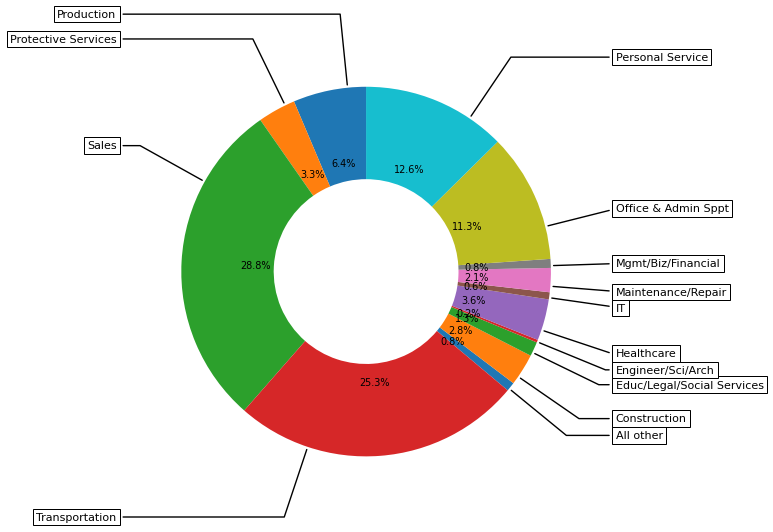

endingsector
All other                      339
Construction                   667
Educ/Legal/Social Services     610
Engineer/Sci/Arch              151
Healthcare                     791
IT                             187
Maintenance/Repair             403
Mgmt/Biz/Financial             523
Not Employed                  3129
Office & Admin Sppt           1880
Personal Service              1746
Production                     683
Protective Services            333
Sales                         1396
Transportation                 851
Name: endingsector, dtype: int64


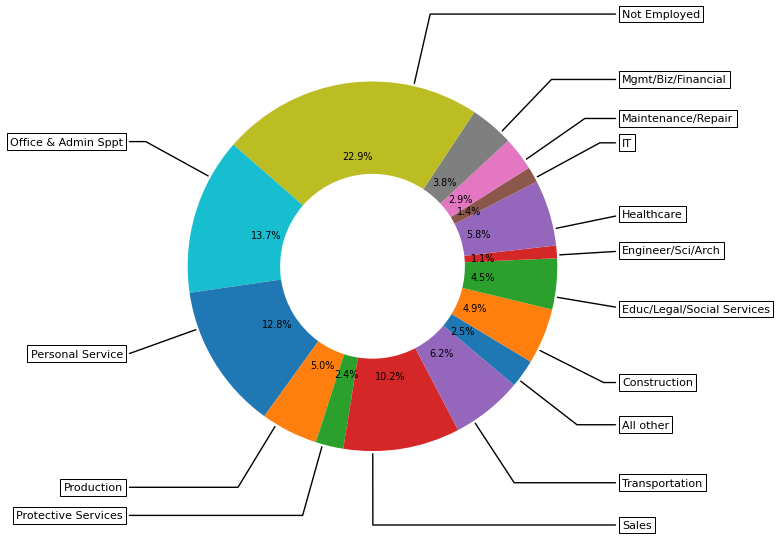

In [614]:
df_startingsector = df.groupby(by=["startingsector"],as_index=True)["startingsector"].count()
print(df_startingsector)
sector_pie(df_startingsector.values, labels = df_startingsector.keys())

df_endingsector = df.groupby(by=["endingsector"])["endingsector"].count()
print(df_endingsector)
sector_pie(df_endingsector.values, labels = df_endingsector.keys())

Educational background exaltation

In [ ]:
print("The percentage of people who succeded in pursuing educational background exaltation is ", round(sum(df["Education at start"]<df["Education at end"])/df.shape[0]*100,2), "%.", sep="")

The percentage of people who succeded in pursuing educational background exaltation is 20.07%.


startingsector
All other                       10
Construction                    39
Educ/Legal/Social Services      17
Engineer/Sci/Arch                6
Healthcare                      47
IT                               7
Maintenance/Repair              28
Mgmt/Biz/Financial               8
Office & Admin Sppt            225
Personal Service               362
Production                     127
Protective Services             85
Sales                         1088
Transportation                 699
Name: startingsector, dtype: int64


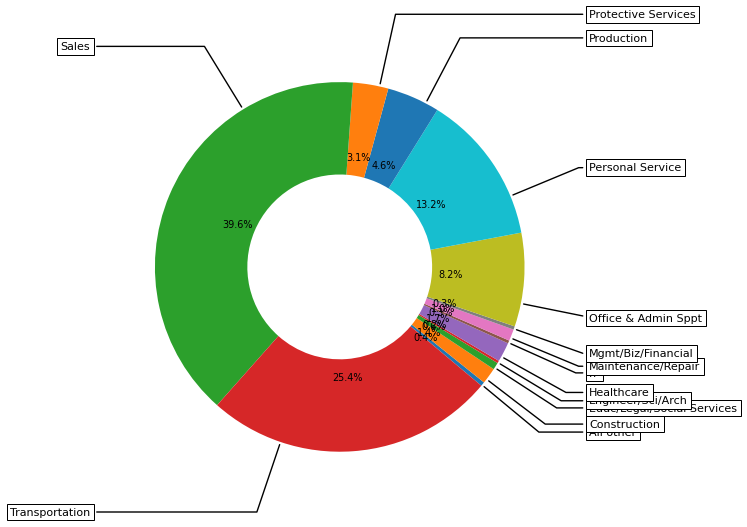

endingsector
All other                      62
Construction                   99
Educ/Legal/Social Services    201
Engineer/Sci/Arch              47
Healthcare                    156
IT                             43
Maintenance/Repair             69
Mgmt/Biz/Financial            100
Not Employed                  665
Office & Admin Sppt           383
Personal Service              356
Production                    108
Protective Services            49
Sales                         311
Transportation                 99
Name: endingsector, dtype: int64


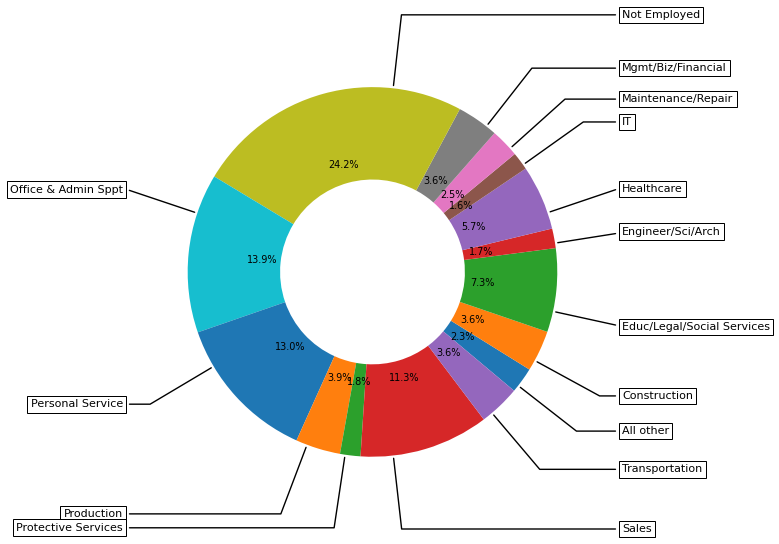

In [618]:
edu_df = df[df["Education at start"]<df["Education at end"]]

df_startingsector = edu_df.groupby(by=["startingsector"])["startingsector"].count()
print(df_startingsector)
sector_pie(df_startingsector.values, labels = df_startingsector.keys())

df_endingsector = edu_df.groupby(by=["endingsector"])["endingsector"].count()
print(df_endingsector)
sector_pie(df_endingsector.values, labels = df_endingsector.keys())

In [619]:
degree = [0,1,2,3]
 
for i in range(len(degree)):
    for j in range(i+1, len(degree)):
        tmp = edu_df[edu_df["Education at start"]==i]
        f = sum(tmp["Education at end"]==j)
        print("From {} to {}:".format(i,j), f, round(f/edu_df.shape[0]*100,2), sep="\t")

From 0 to 1:	1862	67.76
From 0 to 2:	28	1.02
From 0 to 3:	3	0.11
From 1 to 2:	265	9.64
From 1 to 3:	537	19.54
From 2 to 3:	53	1.93


Wage change

In [620]:
print("The percentage of people who succeeded in getting a raise is ", round(sum(df["abswagech3"]>0)/df.shape[0]*100,2), "%.", sep="")

The percentage of people who succeeded in getting a raise is 54.77%.


In [444]:
print("The percentage of people who improved educational background and getting a raise is ", round(sum(edu_df["abswagech3"]>0)/edu_df.shape[0]*100,2), "%.", sep="")

The percentage of people who improved educational background and getting a raise is 59.61%.


startingsector
All other                       68
Construction                   190
Educ/Legal/Social Services      83
Engineer/Sci/Arch               23
Healthcare                     287
IT                              61
Maintenance/Repair             170
Mgmt/Biz/Financial              79
Office & Admin Sppt            917
Personal Service               870
Production                     446
Protective Services            285
Sales                         2309
Transportation                1709
Name: startingsector, dtype: int64


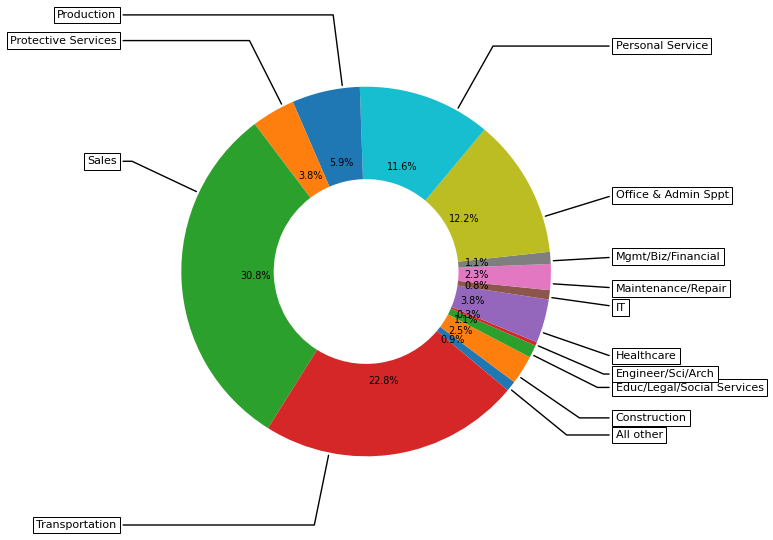

endingsector
All other                      235
Construction                   476
Educ/Legal/Social Services     446
Engineer/Sci/Arch              122
Healthcare                     588
IT                             152
Maintenance/Repair             288
Mgmt/Biz/Financial             436
Not Employed                     1
Office & Admin Sppt           1418
Personal Service              1082
Production                     487
Protective Services            248
Sales                          962
Transportation                 556
Name: endingsector, dtype: int64


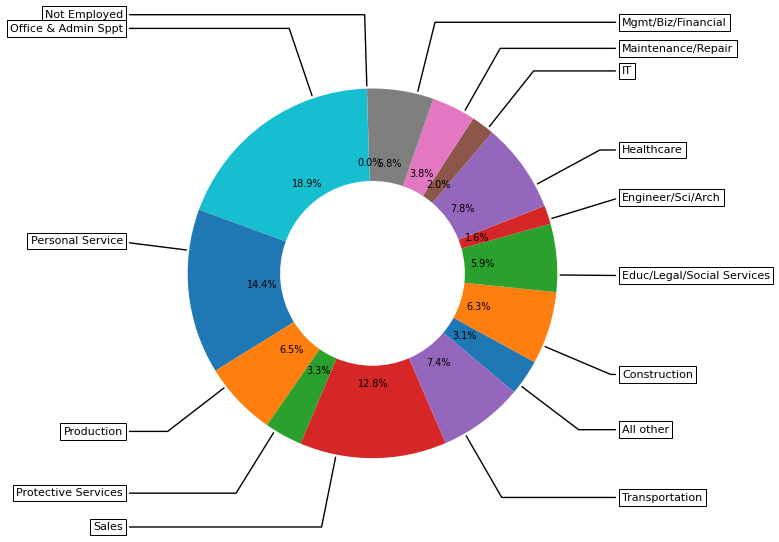

In [409]:
wage_df = df[df["abswagech3"]>0]

df_startingsector = wage_df.groupby(by=["startingsector"])["startingsector"].count()
print(df_startingsector)
sector_pie(df_startingsector.values, labels = df_startingsector.keys())

df_endingsector = wage_df.groupby(by=["endingsector"])["endingsector"].count()
print(df_endingsector)
sector_pie(df_endingsector.values, labels = df_endingsector.keys())

In [449]:
print("Those who received a raise received an average of a {}% increase in wage.".format(round(df["abswagech3"].mean(),2)))

Those who received a raise received an average of a 3.36% increase in wage.


In [446]:
print("Average level of salary increase for those with improved qualifications: {}%".format(round(edu_df[edu_df["abswagech3"]>0]["abswagech3"].mean(),2)))

Average level of salary increase for those with improved qualifications: 7.05%


In [534]:
core = nx.k_core(G2)
nxt.network_summary(core)

GENERAL
	number of nodes: 45
	number of edges: 1372
	is_directed: True
	is_weighted: True
 is_strongly_connected: True
 is_weakly_connected: True
IN-DEGREE (NORMALIZED)
	min: 0.4318181818181818
	mean: 0.692929292929293
	median: 0.6818181818181819
	max: 0.9772727272727273
	top nodes: [4110, 4760, 4720, 5240, 4600, 3600, 4020, 4030, 9620, 5400, 5620, 4220]
	           [0.9772727272727273, 0.9772727272727273, 0.9545454545454546, 0.9545454545454546, 0.8863636363636364, 0.8636363636363636, 0.8636363636363636, 0.8636363636363636, 0.8409090909090909, 0.8409090909090909]
	tail nodes: [8960, 4610, 2720, 4430, 4140, 6230, 9610, 4510, 9640, 4850]
	           [0.5681818181818182, 0.5681818181818182, 0.5681818181818182, 0.5681818181818182, 0.5454545454545454, 0.5454545454545454, 0.5227272727272727, 0.5, 0.4318181818181818, 0.4318181818181818]
OUT-DEGREE (NORMALIZED)
	min: 0.38636363636363635
	mean: 0.692929292929293
	median: 0.6818181818181819
	max: 1.0
	top nodes: [9620, 4720, 4760, 4110, 9130, 49